Run the cell below to import the required packages:

In [110]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_openml
from sklearn.utils import shuffle
from sklearn.datasets import fetch_mldata
from sklearn.cluster import KMeans

Sources:

https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1

https://www.geeksforgeeks.org/k-means-clustering-introduction/

https://stanford.edu/~cpiech/cs221/handouts/kmeans.html

https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html

https://www.datascience.com/learn-data-science/tutorials/introduction-to-k-means-clustering-algorithm-data-science

https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/

### Unsupervised Learning
Up until now, we have been exploring supervised learning algorithms, in which we already have labels on our testing data. Some common tasks within unsupervised learning are clustering and dimensionality reduction. In all of these cases, we wish to learn the inherent structure of our data without using explicitly-provided labels. Unsupervised learning is very useful in exploratory analysis because it can automatically identify structure in data. For example, if an analyst were trying to segment consumers, unsupervised clustering methods would be a great starting point for their analysis. In situations where it is either impossible or impractical for a human to propose trends in the data, unsupervised learning can provide initial insights that can then be used to test individual hypotheses. 

As an example of clustering, using three clusters, we may break the characters below into the following three categories, even though we never explicitly enter into the algorithm the labels of duck, mouse, rabbit:

<img src="images/sup2.png" width=500>

The technique we will use to cluster data is called K-Means clustering.

### K-Means Clustering

K-Means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. Rather than defining groups before looking at the data, clustering allows you to find and analyze the groups that have formed organically. Choosing K is the trickier part.


### Choosing k
AndreyBu, who has more than 5 years of machine learning experience and currently teaches people his skills, says that “the objective of K-means is simple: group similar data points together and discover underlying patterns. To achieve this objective, K-means looks for a fixed number (k) of clusters in a dataset.”

You’ll define a target number k, which refers to the number of centroids you need in the dataset. A **centroid** is the location representing the center of the cluster.

The K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.

The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

### The Algorithm

The algorithm works as follows:

1. First we initialize k points, called means, randomly.
2. Next we categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that mean so far.
3. We repeat the process for a given number of iterations or until the centroids have stabilized, meaning that there is no change in their values because the clustering has been successful. At the end, we have our clusters.

Study this visual carefully to understand the algorithm:

<img src="images/kmeans1.png" width=800>

### Scaling is important
As always, remember that when you use distance-based algorithms you should first normalize the data.

### Example 1: Iris

Let's return to our Iris example. 

Let's initialize our algorithm to give us three clusters, knowing that there are three types of irises.

In [111]:
iris = load_iris()
X = iris.data
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Let's scale the data before we apply our algorithm. Also notice that I am scaling my entire dataset. We don't have a test/train split because we don't have a testing set - we are exploring whether the data might be separated into clusters but we do not have labels ahead of time. We will never be using the target data, y.

In [112]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

However, NOTE THAT WE WILL NOT GIVE THE K-MEANS ALGORITHM THE ACTUAL IRIS LABELS (y) BELOW; WE ONLY TELL IT TO CLUSTER ITEMS INTO THREE CATEGORIES.

Notice how closely 3 clusters resembles the true iris categories. Don't pay too much attention to the code below, just the pictures:

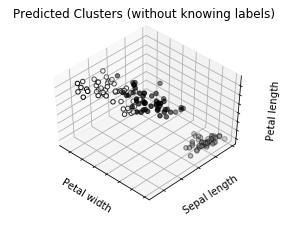

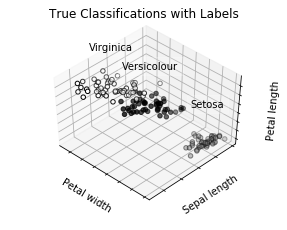

In [113]:
#make the three random centroids to start be the same every time for plotting purposes
np.random.seed(5)

#run the model
model = KMeans(n_clusters=3)
model.fit(X) 

#plot our clustering results
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
labels = model.labels_
ax.scatter(X[:, 3], X[:, 0], X[:, 2],
           c=labels.astype(np.float), edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Predicted Clusters (without knowing labels)')
ax.dist = 12

# Plot the true iris classifications
fig = plt.figure(2, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y_true = np.choose(y, [1,2,0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y_true, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('True Classifications with Labels')
ax.dist = 12


Of course, for this example we knew that we wanted three clusters. What if we were trying to find structure in a dataset that we knew knowing about? For example, suppose that we didn't know that the iris dataset had three classifications and so we happened to try eight clusters:

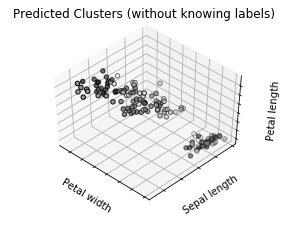

In [114]:
#make the three random centroids to start be the same every time for plotting purposes
np.random.seed(5)

#run the model
model = KMeans(n_clusters=8)
model.fit(X) 

#plot our clustering results
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
labels = model.labels_
ax.scatter(X[:, 3], X[:, 0], X[:, 2],
           c=labels.astype(np.float), edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Predicted Clusters (without knowing labels)')
ax.dist = 12

### Example 2: Digits

Let's take in an even larger sample of digits, the famous MNIST dataset. It's pretty big! Now, there are 70,000 images, each with a size of 28x28 pixels, so 784 attributes for each picture:

In [115]:
digits = load_digits()

In [116]:

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

Here are 10 examples of 3's contained in the dataset:

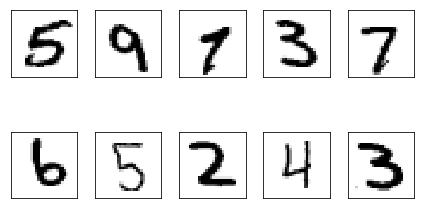

In [117]:
plt.rc("image", cmap="binary") # use black/white palette for plotting
minimum = 20000
for i in range(minimum, minimum+10):
    plt.subplot(2,5,i+1-minimum)
    plt.imshow(X[i].reshape(28,28))
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()

K-Means is such a computationally intensive algorithm that let's shuffle the data and only take the last 5000 (instead of the full 70,000 digits) in order to reduce our runtime:

In [118]:
X, y = shuffle(X, y) 
X = X[-5000:]      
print(len(X))

5000


Let's use 10 clusters (since we know there are 10 digits). We'll store the means of the clusters (the centroids) in a variable called `mu_digits` via a call to `cluster_centers_`. What does the "average" digit in each cluster look like?

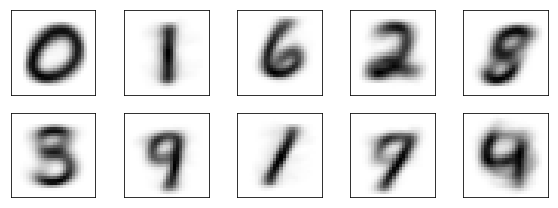

In [119]:
model = KMeans(n_clusters=10)
model.fit(X)

mu_digits = model.cluster_centers_

plt.figure(figsize=(8, 3))
for i in range(2*(mu_digits.shape[0]//2)): # loop over all means
    plt.subplot(2,mu_digits.shape[0]//2,i+1)
    plt.imshow(mu_digits[i].reshape(28,28))
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()

The clustering doesn't quite resemble all of the digits, but remember that we only used 5000 training examples, and that the K-Means algorithm wasn't given any information about the numbers except the fact that they should be sorted into ten different categories! Pretty impressive.

Just out of curiosity, what happens if we had used 8 clusters instead of 10? Sometimes the 4 and 5 get lost but this might vary over different simulations:

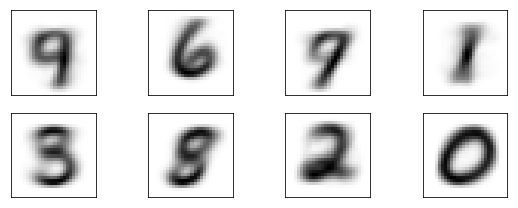

In [120]:
model = KMeans(n_clusters=8)
model.fit(X)

mu_digits = model.cluster_centers_

plt.figure(figsize=(8, 3))
for i in range(2*(mu_digits.shape[0]//2)): # loop over all means
    plt.subplot(2,mu_digits.shape[0]//2,i+1)
    plt.imshow(mu_digits[i].reshape(28,28))
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()

What if we choose 12 clusters instead of 10? We seem to cluster different variations of 0's and 1's separately:

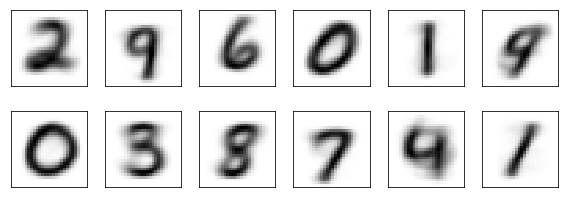

In [121]:
model = KMeans(n_clusters=12)
model.fit(X)

mu_digits = model.cluster_centers_

plt.figure(figsize=(8, 3))
for i in range(2*(mu_digits.shape[0]//2)): # loop over all means
    plt.subplot(2,mu_digits.shape[0]//2,i+1)
    plt.imshow(mu_digits[i].reshape(28,28))
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()

### Example 3 - Fleets

In the above examples, it was kind of silly to use unsupervised learning, since we knew there were exactly three iris types and exactly 10 digits. Unsupervised learning tends to be more useful when we don't know the structure ahead of time.

One last example is a business example using delivery fleet driver data. For the sake of simplicity, we'll only be looking at two driver features: mean distance driven per day and the mean percentage of time a driver was >5 mph over the speed limit. In general, this algorithm can be used for any number of features, so long as the number of data samples is much greater than the number of features.

In [259]:
df = pd.read_csv('data/fleet.csv', sep='\t')
df.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0


Text(0, 0.5, 'Percentage of the time speeding')

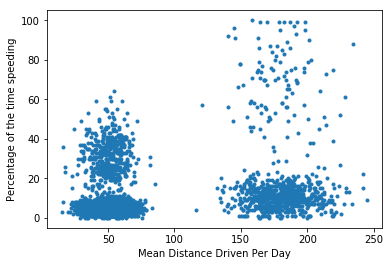

In [260]:
plt.plot(df['Distance_Feature'], df['Speeding_Feature'], '.')
plt.xlabel('Mean Distance Driven Per Day')
plt.ylabel('Percentage of the time speeding')

Let's scale the data and apply the algorithm:

In [263]:
X=df.drop('Driver_ID', axis=1)

sc_X = StandardScaler()
X = sc_X.fit_transform(X)

model = KMeans(n_clusters=2)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

The two cluster centroids are located at:

In [264]:
model.cluster_centers_

array([[-0.48581565, -0.13816168],
       [ 1.94630276,  0.55351131]])

We can view these clusters on a graph, along with their centroids, we'll need to transform our data back first:

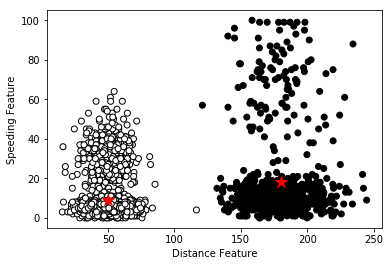

In [265]:
X = sc_X.inverse_transform(X)

model.cluster_centers_ = sc_X.inverse_transform([model.cluster_centers_])

x_coord = [point[0] for point in X]
y_coord = [point[1] for point in X]

plt.scatter(x_coord, y_coord, c=model.labels_.astype(np.float), edgecolor='k')
plt.xlabel('Distance Feature')
plt.ylabel('Speeding Feature')

for cluster in model.cluster_centers_[0]:
    plt.plot(cluster[0], cluster[1], 'r*', markersize=12)
   

Using domain knowledge of the dataset, we can infer that Group 1 is urban drivers and Group 2 is rural drivers in the clusters above.

Now, let's try using four clusters.

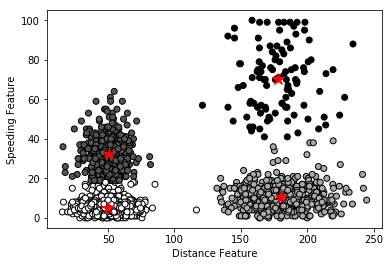

In [266]:
X=df.drop('Driver_ID', axis=1)

sc_X = StandardScaler()
X = sc_X.fit_transform(X)

model = KMeans(n_clusters=4)
model.fit(X)

X = sc_X.inverse_transform(X)

model.cluster_centers_ = sc_X.inverse_transform([model.cluster_centers_])

x_coord = [point[0] for point in X]
y_coord = [point[1] for point in X]

plt.scatter(x_coord, y_coord, c=model.labels_.astype(np.float), edgecolor='k')
plt.xlabel('Distance Feature')
plt.ylabel('Speeding Feature')

for cluster in model.cluster_centers_[0]:
    plt.plot(cluster[0], cluster[1], 'r*', markersize=12)

 We see that four distinct groups have been identified by the algorithm; now speeding drivers have been separated from those who follow speed limits, in addition to the rural vs. urban divide. The threshold for speeding is lower with the urban driver group than for the rural drivers, likely due to urban drivers spending more time in intersections and stop-and-go traffic.

### How to choose the number of clusters

One of the most common doubts everyone has while working with K-Means is selecting the right number of clusters.

So, let’s look at a technique that will help us choose the right value of clusters for the K-Means algorithm. 

**Inertia** tells us how far the points within a cluster are. So, inertia actually calculates the sum of all the points within a cluster from the centroid of that cluster.

How can we decide the optimum number of clusters? One thing we can do is plot a graph, also known as an elbow curve, where the x-axis will represent the number of clusters and the y-axis will be an evaluation metric. Let’s say inertia for now.

When we change the cluster value from 2 to 4, the inertia value reduced very sharply. This decrease in the inertia value reduces and eventually becomes constant as we increase the number of clusters further.

<img src="images/kmeans2.png" width=500>

Here, we can choose any number of clusters between 6 and 10. We can have 7, 8, or even 9 clusters. You must also look at the computation cost while deciding the number of clusters. If we increase the number of clusters, the computation cost will also increase. So, if you do not have high computational resources, you may need to choose a lesser number of clusters.

Going back to the truck driving example with four clusters, we find that the inertia measure is built in to the knn algorithm:

In [267]:
print(model.inertia_)

739.1534508645581


We will first fit multiple k-means models and in each successive model, we will increase the number of clusters. We will store the inertia value of each model and then plot it to visualize the result:

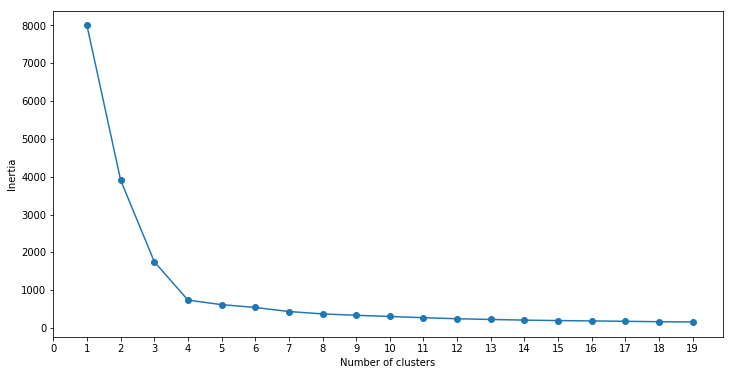

In [272]:
X=df.drop('Driver_ID', axis=1)

sc_X = StandardScaler()
X = sc_X.fit_transform(X)

# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    model = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    model.fit(X)
    SSE.append(model.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(np.arange(20));

We can clearly see that the elbow is located at k=4. Thus, our intuition to use four clusters seems appropriate.